# Sentiment Analysis and Zero-Shot Classification

## Garden Tech

In [195]:
from google.colab import files
src = list(files.upload().values())[0]

Saving helper_functions.py to helper_functions (1).py


In [196]:
open('helper_functions.py','wb').write(src)
import helper_functions 

1433

In [197]:
from helper_functions import *

In [198]:
import pandas as pd
!pip install numpy==1.22.0
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.max_columns', None) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [199]:
!pip install torch torchvision torchaudio
import torch

!pip install tensorflow
import tensorflow as tf
print(tf.reduce_sum(tf.random.normal([1000, 1000])))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
tf.Tensor(1064.3291, shape=(), dtype=float32)


In [200]:
!pip install transformers
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [201]:
from google.colab import files
uploaded = files.upload()

Saving GardenTech.csv to GardenTech (1).csv


In [224]:
df = pd.read_csv('GardenTech (1).csv', index_col = [0])
df

,segment,review_id,product_name,producturl,retailer,brand,retailer_product_id,base_id,variants_flag,review_creation_date,year,month,week,review_title,review_text,review_type,price,rating,images,videos,helpful_votes,promotion_flag,review_lower,date,word_count,sentiment,effective,efficient,cost,ease of use
22240,Garden,134189,Sevin Ready to Use 5% Dust 3 lb.,https://www.homedepot.com/p/Sevin-3-lbs-Ready-...,Homedepot,GardenTech,316708109,100539964,Yes,2022-05-16T00:00:00,2022,5,20,Excellent insect killer,[This review was collected as part of a promot...,syndicated reviews,15.47,5,1,0,0,Yes,[this review was collected as part of a promot...,2022/05/16,26,positive,1.0,NaN,NaN,NaN
27585,Garden,143517,Sevin Ready-to-Spray Bug Killer 32 oz.,https://www.lowes.com/pd/Sevin-1-Quart-Garden-...,Lowes,GardenTech,1000477903,1000477903,No,2022-06-27T00:00:00,2022,6,26,Rip off!,See the pictures. When I took the lid off the ...,syndicated reviews,15.48,1,0,0,0,No,see the pictures. when i took the lid off the ...,2022/06/27,44,negative,1.0,NaN,1.0,NaN
25693,Garden,141625,Sevin Ready-to-Use 1.33 gal.,http://www.homedepot.com/p/303593722,Homedepot,GardenTech,311707480,303593722,Yes,2022-06-07T00:00:00,2022,6,23,Amazing results,[This review was collected as part of a promot...,syndicated reviews,25.32,5,0,0,0,Yes,[this review was collected as part of a promot...,2022/06/07,50,positive,1.0,1.0,NaN,NaN
19048,Garden,130514,Sevin Ready to Use 5% Dust 1 lb.,http://www.homedepot.com/p/203027209,Homedepot,GardenTech,203027209,203027209,No,2022-05-28T00:00:00,2022,5,21,Works great!,[This review was collected as part of a promot...,syndicated reviews,6.27,5,0,0,0,Yes,[this review was collected as part of a promot...,2022/05/28,27,positive,1.0,NaN,NaN,NaN
22861,Garden,134862,Sevin Ready to Use 5% Dust 1 lb. 3-Pack,https://www.lowes.com/pd/Sevin-5-Dust-1-lb-Gar...,Lowes,GardenTech,1000481173,1000481173,No,2022-05-22T00:00:00,2022,5,20,Worked great,[This review was collected as part of a promot...,syndicated reviews,14.98,5,1,0,0,Yes,[this review was collected as part of a promot...,2022/05/22,119,positive,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22425,Garden,134388,Sevin Ready-to-Use 1 gal.,https://www.lowes.com/pd/Sevin-1-Gallon-Garden...,Lowes,GardenTech,50261725,50261725,No,2022-05-16T00:00:00,2022,5,20,Very easy to use!,[This review was collected as part of a promot...,syndicated reviews,16.98,5,0,0,0,Yes,[this review was collected as part of a promot...,2022/05/16,34,positive,1.0,NaN,NaN,1.0
22198,Garden,134146,Sevin Ready to Use 5% Dust 3 lb.,https://www.homedepot.com/p/Sevin-3-lbs-Ready-...,Homedepot,GardenTech,316708109,100539964,Yes,2022-05-22T00:00:00,2022,5,20,Insect Killer Dust,[This review was collected as part of a promot...,syndicated reviews,15.47,4,0,0,0,Yes,[this review was collected as part of a promot...,2022/05/22,45,positive,1.0,NaN,NaN,NaN
20489,Garden,132140,Sevin Insect Killer,http://www.homedepot.com/p/303593722,Homedepot,GardenTech,100598614,303593722,Yes,2022-05-24T00:00:00,2022,5,21,Awesome product!,[This review was collected as part of a promot...,syndicated reviews,7.49,5,0,0,0,Yes,[this review was collected as part of a promot...,2022/05/24,178,positive,1.0,1.0,NaN,NaN
28035,Garden,143973,Sevin Insect Killer Ready to Use2 1.33 Gal,https://www.lowes.com/pd/Sevin-Ready-to-Use-1-...,Lowes,GardenTech,1001413712,1001413712,No,2022-06-07T00:00:00,2022,6,23,Efficient and Easy to Use,[This review was collected as part of a promot...,syndicated reviews,22.98,4,3,0,0,Yes,[this review was collected as part of a promot...,2022/06/07,155,positive,1.0,NaN,NaN,1.0


# Sentiment Analysis

In [225]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

sentiment = []
index = -1
for sentence in df['review_lower']:
    index+=1
    if(index%20 == 0):
        print(index)

    result = sentiment_pipeline(sentence[:512])[0]
    sentiment.append(result['label'])
df['sentiment'] = sentiment

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380


In [226]:
#sample sentiment analysis
sample_review = list(df['review_text'])[1]
result = sentiment_pipeline(sample_review)
result

##negative with score of 0.797

[{'label': 'negative', 'score': 0.7970485091209412}]

## Zero Shot Classificaiton

In [227]:
import transformers
from transformers import pipeline

In [228]:
classifier  = pipeline("zero-shot-classification",  model = "facebook/bart-large-mnli")

In [229]:
# insert the labels you identified from above section
type = ['cost', 'efficient', 'effective', 'ease of use']

In [230]:
#setting empty values for the columns
index = -1
for label in type:
    df[label + '_m'] = -1

for j in range(len(df)):
    #counter for progress/debugging
    index+=1
    if(index%20 == 0): 
        print(index)
        
    #running the classifier on the column    
    res = classifier(
        df.iloc[j]['review_lower'],
        candidate_labels = type,
        multi_label = True
    )
    #setting the column values according to the output from the classifier ("_m" = multiclass)
    for i in range(len(res['labels'])):
        df[res['labels'][i]+ '_m'].iloc[j] = res['scores'][i]

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380


In [231]:
# create a "max" column for metric purposes
df['max'] = df[['cost_m', 'efficient_m', 'effective_m', 'ease of use_m']].max(axis=1)

In [232]:
df = df.reset_index(drop=True)
df['other_m'] = 0
for row in range(len(df)):
    if df.at[row, 'max'] < 0.7:
        df.at[row, 'other_m'] = 1

In [233]:
def imputation(list):
    i = []
    for prediction in list:
        if prediction < 0.7:
            i.append(0)
        else:
            i.append(1)
    
    return(i)
df['cost_m'] = imputation(df['cost_m'])
df['efficient_m'] = imputation(df['efficient_m'])
df['effective_m'] = imputation(df['effective_m'])
df['ease of use_m'] = imputation(df['ease of use_m'])

In [234]:
df['cost_m'] = df['cost_m'].replace(1, 'cost')
df['cost_m'] = df['cost_m'].replace(0, '')
df['efficient_m'] = df['efficient_m'].replace(1, 'efficient')
df['efficient_m'] = df['efficient_m'].replace(0, '')
df['effective_m'] = df['effective_m'].replace(1, 'effective')
df['effective_m'] = df['effective_m'].replace(0, '')
df['ease of use_m'] = df['ease of use_m'].replace(1, 'ease of use')
df['ease of use_m'] = df['ease of use_m'].replace(0, '')
df['other_m'] = df['other_m'].replace(1, 'other')
df['other_m'] = df['other_m'].replace(0, '')

In [235]:
align_list=[]
for i in range(len(df)):
    interim_list = []
    interim_list = df.iloc[i][27],df.iloc[i][28],df.iloc[i][29],df.iloc[i][30],df.iloc[i][31]
    align_list.append(interim_list)
df['align_type']=align_list

In [236]:
df.to_csv('prepared_df.csv')

In [ ]:
from google.colab import files
files.download("prepared_df.csv")

# Insights

In [237]:
df = pd.read_csv('prepared_df.csv')

In [241]:
from google.colab import files
src = list(files.upload().values())[0]

Saving prepared_df.csv to prepared_df (1).csv


In [252]:
df = pd.read_csv('prepared_df (1).csv')

## Heatmap

In [260]:
for i in range(len(df)):
  for text in df['align_type'].iloc[i].split(' '):
    if text == 'nan,' or text == 'nan)' or text == '(nan,':
      df['align_type'].iloc[i]=df['align_type'].iloc[i].replace(text,'')
      df['align_type'].iloc[i]=''.join(c for c in df['align_type'].iloc[i] if c not in "'")
      if df['align_type'].iloc[i][-2] == ',':
        df['align_type'].iloc[i]=df['align_type'].iloc[i][:-2]
      df['align_type'].iloc[i]=df['align_type'].iloc[i].replace('(',"").replace(' ',"")
      if df['align_type'].iloc[i][-1] == ',':
        df['align_type'].iloc[i]=df['align_type'].iloc[i][:-1]
      if df['align_type'].iloc[i] == 'other)':
        df['align_type'].iloc[i]='other'
      for text in df['align_type'].iloc[i].split(','):
        if text == 'easeofuse':
          df['align_type'].iloc[i]=df['align_type'].iloc[i].replace(text,'ease of use')
      df['align_type'].iloc[i]=df['align_type'].iloc[i].replace(',',', ')

In [245]:
df2=df.groupby(['align_type', 'sentiment'])['align_type'].count().rename("count").groupby(level = 0).transform(lambda x: x/400*100).reset_index(name = 'count %')


<Figure size 864x360 with 0 Axes>

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

[Text(79.5, 0.5, ''), Text(0.5, -248.375, '')]

[Text(79.5, 0.5, ''), Text(0.5, -248.375, '')]

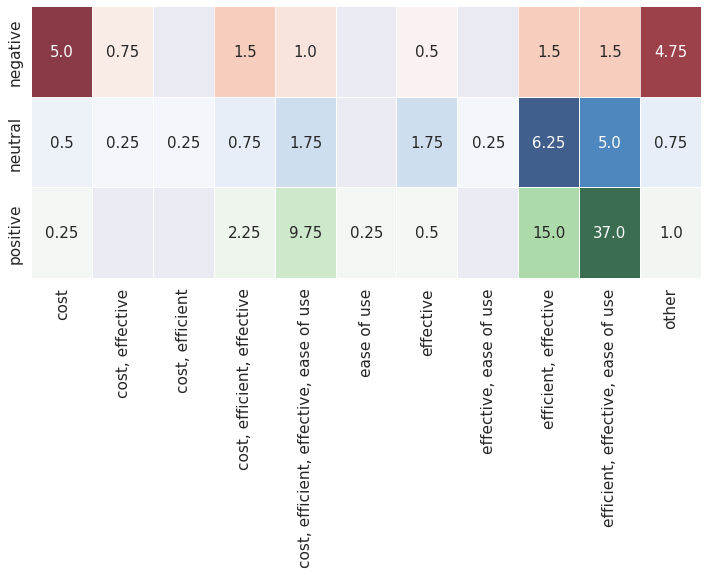

In [246]:
table = pd.pivot_table(df2, values='count %', index=['sentiment'], columns=['align_type'])

plt.figure(figsize=(12, 5))
sns.set(font_scale=1.4)
# Reds
data1 = table.copy()
data1.loc['negative'] = float('nan')
data1.loc['neutral'] = float('nan')
ax=sns.heatmap(data1, annot=True, cmap="Greens", alpha=0.75,fmt=".3",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

# Blue
data2 = table.copy()
data2.loc['negative'] = float('nan')
data2.loc['positive'] = float('nan')
ax=sns.heatmap(data2, annot=True, cmap="Blues", alpha=0.75,fmt=".3",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")
# Greens
data3 = table.copy()
data3.loc['positive'] = float('nan')
data3.loc['neutral'] = float('nan')
ax=sns.heatmap(data3, annot=True, cmap="Reds", alpha=0.75,fmt=".3",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

In [247]:
df3=df.groupby(['align_type', 'sentiment'])['align_type'].count().rename("count").groupby(level = 0).transform(lambda x: x/x.sum()*100).reset_index(name = 'count %')

<Figure size 864x360 with 0 Axes>

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

[Text(79.5, 0.5, ''), Text(0.5, -248.375, '')]

[Text(79.5, 0.5, ''), Text(0.5, -248.375, '')]

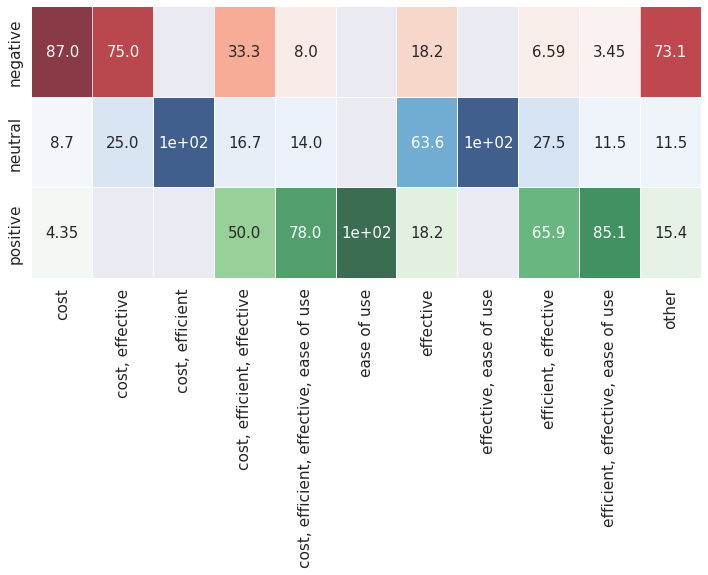

In [248]:
table = pd.pivot_table(df3, values='count %', index=['sentiment'], columns=['align_type'])

plt.figure(figsize=(12, 5))
sns.set(font_scale=1.4)
# Reds
data1 = table.copy()
data1.loc['negative'] = float('nan')
data1.loc['neutral'] = float('nan')
ax=sns.heatmap(data1, annot=True, cmap="Greens", alpha=0.75,fmt=".3",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

# Blue
data2 = table.copy()
data2.loc['negative'] = float('nan')
data2.loc['positive'] = float('nan')
ax=sns.heatmap(data2, annot=True, cmap="Blues", alpha=0.75,fmt=".3",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")
# Greens
data3 = table.copy()
data3.loc['positive'] = float('nan')
data3.loc['neutral'] = float('nan')
ax=sns.heatmap(data3, annot=True, cmap="Reds", alpha=0.75,fmt=".3",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

# Treemap

In [ ]:
for i in range(len(df)):
  for text in df['align_type'].iloc[i].split(' '):
    if text == 'nan,' or text == 'nan)' or text == '(nan,':
      df['align_type'].iloc[i]=df['align_type'].iloc[i].replace(text,'')
      df['align_type'].iloc[i]=''.join(c for c in df['align_type'].iloc[i] if c not in "'")
      if df['align_type'].iloc[i][-2] == ',':
        df['align_type'].iloc[i]=df['align_type'].iloc[i][:-2]
      df['align_type'].iloc[i]=df['align_type'].iloc[i].replace('(',"").replace(' ',"")
      if df['align_type'].iloc[i][-1] == ',':
        df['align_type'].iloc[i]=df['align_type'].iloc[i][:-1]
      if df['align_type'].iloc[i] == 'other)':
        df['align_type'].iloc[i]='other'
      for text in df['align_type'].iloc[i].split(','):
        if text == 'easeofuse':
          df['align_type'].iloc[i]=df['align_type'].iloc[i].replace(text,'ease of use')
      df['align_type'].iloc[i]=df['align_type'].iloc[i].replace(',',', ')

In [256]:
# Treemap: percentages within each sentiment
from collections import defaultdict
import plotly
import plotly.express as px

data =  df
fig = px.treemap(data, path=['sentiment', 'align_type'])

fig.data[0].textinfo = 'label+text+percent parent'
fig.data[0]['textfont']['color'] = "white"
fig.data[0]['textfont']['size'] = 15
fig.data[0].textposition = 'middle center'

fig.layout.hovermode = False

fig.show()

In [257]:
# Treemap: percentages against entire sentiments altogether
from collections import defaultdict
import plotly
import plotly.express as px

data =  df
fig = px.treemap(data, path=['sentiment', 'align_type'])

fig.data[0].textinfo = 'label+text+percent root'
fig.data[0]['textfont']['color'] = "white"
fig.data[0]['textfont']['size'] = 15
fig.data[0].textposition = 'middle center'

fig.layout.hovermode = False

fig.show()

# Rating - Review Insight

In [77]:
from collections import defaultdict
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)

## Reviews with rating score 5

In [184]:
df_rating5 = df[df['rating'] == 5]

Text(0.5, 1.0, 'Top 10 Products with 5 Ratings')

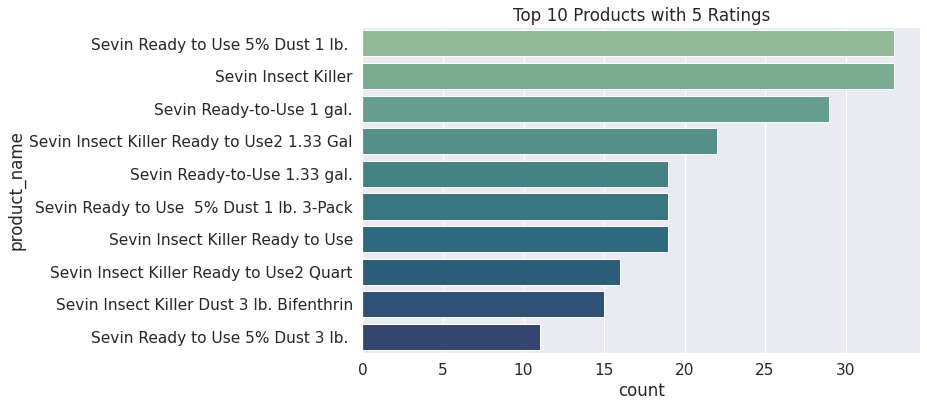

In [185]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title('Top 10 Products with 5 Ratings');
sns.countplot(y = 'product_name', data = df_rating5, order = df_rating5['product_name'].value_counts()[0:10].index, palette=sns.color_palette("crest", n_colors=10))
#plt.savefig('figs/negative_homedepot', bbox_inches = 'tight');

## Reviews with rating score 1

In [86]:
df_rating1 = df[df['rating'] == 1]

Text(0.5, 1.0, 'Top 10 Products with 1 Ratings')

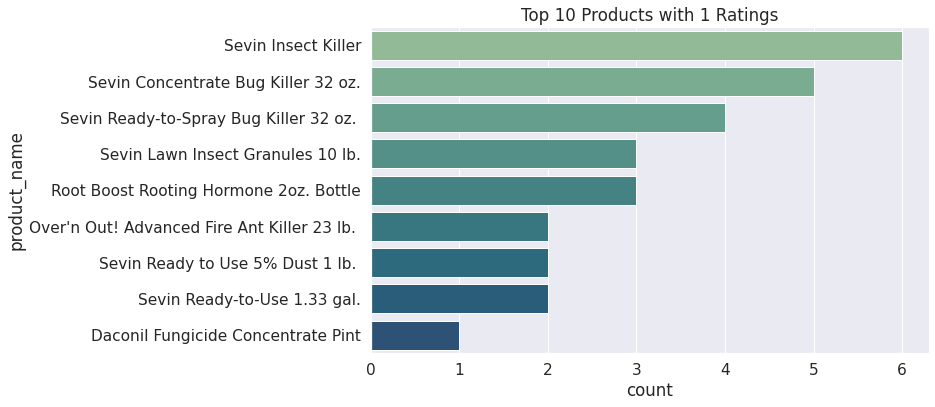

In [87]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title('Top 10 Products with 1 Ratings');
sns.countplot(y = 'product_name', data = df_rating1, order = df_rating1['product_name'].value_counts()[0:10].index, palette=sns.color_palette("crest", n_colors=10))
#plt.savefig('figs/negative_homedepot', bbox_inches = 'tight');

In [88]:
## Get the bar chart from 1 rated reviews ##
freq_dict = defaultdict(int)
for sent in df_rating1["review_lower"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(10), 'green')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=600, width=600, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots');

/usr/local/lib/python3.8/dist-packages/plotly/tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [89]:
df.to_csv('evaluation_GardenTech.csv')

# N-gram

In [83]:
from collections import defaultdict
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [188]:
## Get the bar chart from 5 rated reviews ##
freq_dict = defaultdict(int)
for sent in df_rating5["review_lower"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(10), 'green')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=600, width=600, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots');